In [24]:
import pandas as pd

# Read your data, assuming your date column is named 'date_column'
df = pd.read_csv('Total Sales N3.csv')

In [25]:
# Here I use the datetime function to convert the week# to an actual date for easy plotting
df['Date'] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Week"].astype(str) + "-1", format='%Y-%U-%w')

In [26]:
# Convert the 'date_column' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'date_column' as the index
df.set_index('Date', inplace=True)

# Now, df has a datetime index
print(df.tail())

            Year  Week    Need State     Amount
Date                                           
2023-09-25  2023    39  Need State 3  199078.50
2023-10-02  2023    40  Need State 3  301844.25
2023-10-09  2023    41  Need State 3  121078.50
2023-10-16  2023    42  Need State 3  377325.75
2023-10-23  2023    43  Need State 3   19847.25


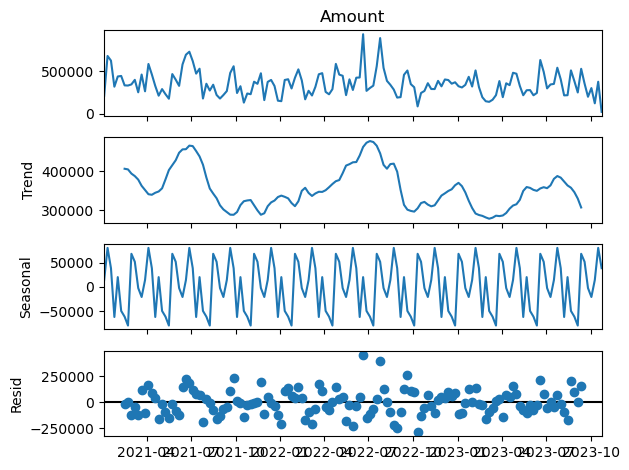

/Users/tyrachung/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/tyrachung/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/tyrachung/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


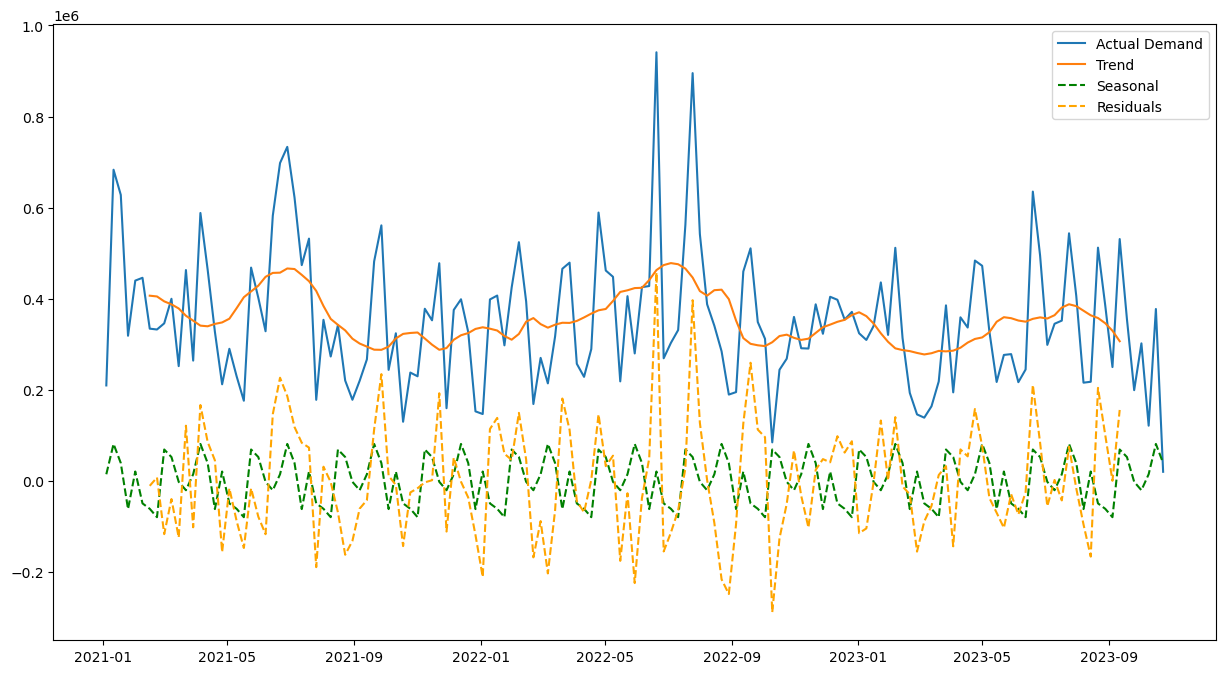

In [21]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Additive decomposition
result = seasonal_decompose(df['Amount'], model='additive', period=12)  # Assuming seasonality repeats every 12 periods

# Plot decomposed components
result.plot()
plt.show()

# Fit an ARIMA model to the residuals
residuals = result.resid.dropna()  # Drop NaN values introduced by the decomposition
order = (1, 0, 1)  # Adjust the order based on your data and model evaluation
arima_model = ARIMA(residuals, order=order)
arima_fit = arima_model.fit()

# Forecast future values
forecast_steps = 52  # Adjust based on your forecasting horizon
forecast = arima_fit.get_forecast(steps=forecast_steps)

# Get forecast values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(15, 8))
plt.plot(df['Amount'], label='Actual Demand')
plt.plot(result.trend, label='Trend')
plt.plot(result.seasonal, label='Seasonal', linestyle='dashed', color='green')
plt.plot(result.resid, label='Residuals', linestyle='dashed', color='orange')
plt.legend()
plt.show()


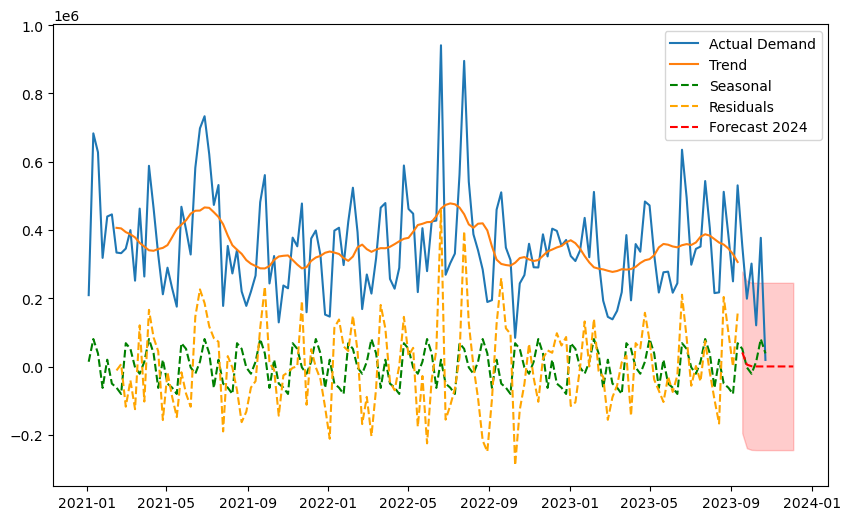

In [22]:
# Forecast for the year 2024
forecast_steps = 12  # Adjust based on your forecasting horizon
forecast_index_2024 = pd.date_range(start='2024-01-01', periods=forecast_steps, freq='W')  # Adjust the frequency based on your data
forecast_2024 = arima_fit.get_forecast(steps=forecast_steps)

# Get forecast values and confidence intervals
forecast_values_2024 = forecast_2024.predicted_mean
confidence_intervals_2024 = forecast_2024.conf_int()

# Plot the original data, fitted values, and forecast including 2024
plt.figure(figsize=(10, 6))
plt.plot(df['Amount'], label='Actual Demand')
plt.plot(result.trend, label='Trend')
plt.plot(result.seasonal, label='Seasonal', linestyle='dashed', color='green')
plt.plot(result.resid, label='Residuals', linestyle='dashed', color='orange')
plt.plot(forecast_values_2024, label='Forecast 2024', linestyle='dashed', color='red')
plt.fill_between(confidence_intervals_2024.index, confidence_intervals_2024.iloc[:, 0], confidence_intervals_2024.iloc[:, 1], color='red', alpha=0.2)
plt.legend()
plt.show()